## <strong> A - Importation des modules </strong>

In [1]:
import warnings
warnings.filterwarnings('ignore')

########################################

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib as mpl
import sklearn
import os

#########################################

import seaborn as sns
#%matplotlib inline
#%matplotlib notebook
sns.set()

#############################################

mpl.rcParams["figure.figsize"] = (12,8)

#########################################

import import_ipynb
from P5_01_Mes_fonctions import *

importing Jupyter notebook from P5_01_Mes_fonctions.ipynb


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## <strong> B - Importation des données </strong>

In [2]:
data = pd.read_csv("data_freq.csv")
if "Unnamed: 0" in data.columns : data.drop( ["Unnamed: 0"] , axis = 1 , inplace=True)

data.sort_values(by="date_achat_client",axis=0 , ascending=True, ignore_index=True , inplace=True)

In [3]:
data

,date_achat_client,Nombre_commandes,Nbr_mode_de_paiement,payment_value,review_score,order_items_quantity,items_mean_price,distance_client_vendeur_Km,durée_reception_cmd_jr,durée_reception_respectée_jr,payment_type,customer_city,seller_city
0,2.406134,3,1.333333,137.16,4.666667,3.0,34.963333,122.257752,12.063530,-6.855208,credit_card,sao paulo,cascavel
1,2.706134,1,1.000000,39.09,4.000000,1.0,21.900000,823.137906,24.057500,-10.236366,boleto,panambi,catanduva
2,2.876169,1,1.000000,35.61,1.000000,1.0,21.500000,167.638870,35.581169,-16.542662,credit_card,rio de janeiro,sao paulo
3,2.884444,1,1.000000,53.73,3.000000,1.0,36.490000,752.481087,30.572581,-25.542975,boleto,porto alegre,sorocaba
4,2.920868,1,1.000000,133.46,1.000000,1.0,119.900000,144.430962,27.542813,-22.536319,credit_card,hortolandia,ibitinga
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90013,697.518044,1,1.000000,73.10,1.000000,1.0,63.900000,18.797655,1.432269,-3.049688,credit_card,sao paulo,sao paulo
90014,697.596100,1,1.000000,510.96,5.000000,3.0,209.000000,5.834675,1.087870,-4.316030,credit_card,curitiba,curitiba
90015,697.596157,1,1.000000,61.29,5.000000,1.0,45.900000,318.659197,1.106979,-11.296863,voucher,paracatu,belo horizonte
90016,697.619444,1,1.000000,33.23,3.000000,1.0,24.900000,7.811394,1.072905,-3.307650,credit_card,sao caetano do sul,sao paulo


# <strong>C -  Normalisation et selection de colonnes  </strong>

In [4]:
columns =  ["items_mean_price","Nombre_commandes","payment_value","review_score"]
base =  selection_colonnes_norm(data , columns= columns)
base.reset_index(inplace=True, drop = True)
base

,items_mean_price,Nombre_commandes,payment_value,review_score
0,-0.477556,7.496604,-0.122589,4.666667
1,-0.546989,-0.161989,-0.551686,4.000000
2,-0.549115,-0.161989,-0.566912,1.000000
3,-0.469442,-0.161989,-0.487630,3.000000
4,-0.026115,-0.161989,-0.138778,1.000000
...,...,...,...,...
90013,-0.323757,-0.161989,-0.402878,1.000000
90014,0.447455,-0.161989,1.512941,5.000000
90015,-0.419428,-0.161989,-0.454551,5.000000
90016,-0.531043,-0.161989,-0.577326,3.000000


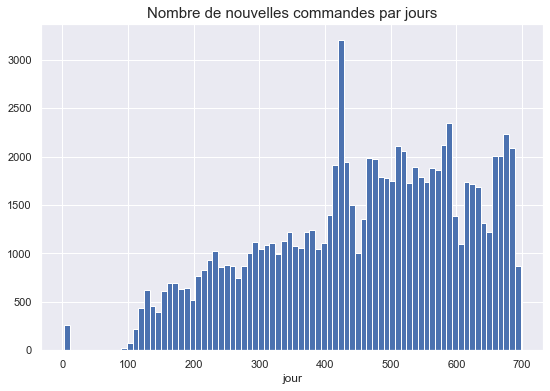

In [5]:
plt.figure(figsize=(9,6))
data["date_achat_client"].hist(bins=80)
plt.title("Nombre de nouvelles commandes par jours", size = 15)
plt.xlabel("jour")
plt.show()

## <strong> D - Modèle </strong>

In [6]:
model_hc = sklearn.cluster.AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [7]:
date_achat = data["date_achat_client"]

init = 230
etendue = range(0 , 12 ) 
record_label = False
labl_file_name = "data_labels"

## <strong> E - Calculs des predictions du modèle : Labels </strong>

In [8]:
if record_label :
    masque = base.loc[ date_achat <= init , : ].index
    labl = np.array([])
    for periode in etendue :
        u = model_hc.fit_predict( base.loc[ date_achat <= init + 30*periode , :] )[masque]
        labl = np.array([ *labl , u ])
    labl = pd.DataFrame(labl , columns= masque, index = etendue )
    labl.to_csv(f"{labl_file_name}_init_{init}.csv")
else :
    for name in os.listdir() :
        if labl_file_name in name and f"{init}" in name : 
            labl = pd.read_csv(name)
            if "Unnamed: 0" in labl.columns : labl.drop( ["Unnamed: 0"] , axis = 1 , inplace=True)
            break

## <strong> F - Calculs des SCORE_ARI </strong>

In [9]:
ARI_score = []
for i in labl.index :
    labl_ref =  labl.loc[i,:]
    ARI_ref = []
    for j in labl.index :
        labl_seq = labl.loc[j,:]
        if i != j :
            ARI_ref.append( sklearn.metrics.adjusted_rand_score(labl_ref , labl_seq)  )
        elif i ==j  :
            ARI_ref.append( 1. )
    ARI_score = np.array([ *ARI_score , ARI_ref ])

##  <strong> G - Représentation graphique de l'évolution avec les Mois </strong>

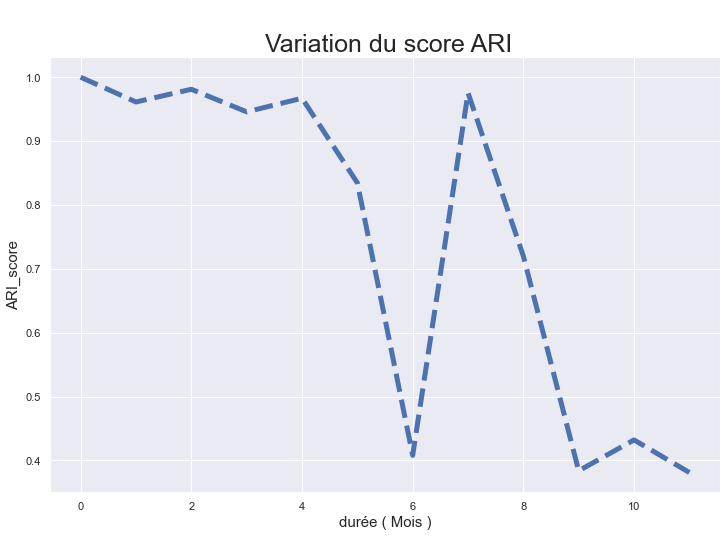

In [10]:
plt.title("\n Variation du score ARI", size=25)

for i in range( 0 , ARI_score.shape[0]-7 , 12 ) :
    depletion = np.exp(-0.7*i/ARI_score.shape[0])
    sns.lineplot( labl.index[i:] , ARI_score[i,i:],lw=5*depletion , alpha = depletion , ls = "--")

plt.xlabel("durée ( Mois )", size=15)
plt.ylabel("ARI_score", size= 15)
plt.show()